# Problem Statement:

**Every public company publishes financial statements to declare financial activities and position of a business. This financial statement contains many tables to present the information. We would like to classify this tables into predefined categories, such as below.**
- 1)	Income Statements
- 2)	Balance Sheets
- 3)	Cash Flows
- 4)	Notes
- 5)	Others


In [1]:
# IMPORTING Required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os
from bs4 import BeautifulSoup
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pickle
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

# Data_Gathaering

## from given html file gathering of data

In [2]:
os.listdir("C:\\Users\\Akash\\Desktop\\Table Classifier Hackathon\\Problem1\\Dataset - Problem 1\\TableClassifierQuaterlyWithNotes\\")

['Balance Sheets', 'Cash Flow', 'Income Statement', 'Notes', 'Others']

In [28]:
def extract_text(path):
    X = []
    y=[]
    for doc_class in os.listdir(path):
        for doc in os.listdir(path+"\\"+doc_class):
            doc_path = path+"\\"+doc_class+"\\"+doc
            doc_ext = doc.rsplit('.')[-1].lower()
            if doc_ext=='html':
                print('Document ',doc," is=> ",doc_class)
                with open(doc_path, encoding="utf8") as f:
                    soup = BeautifulSoup(f)
                if soup(["script", "style"]):
                    for script in soup(["script", "style"]):
                        script.extract()

                text = soup.get_text()
                string = re.sub(r'\n',' ' ,text.lower())
                string = re.sub(r'\d',' ',string)
                string = re.sub(r'\W+',' ',string)
                X.append(string)
                y.append(doc_class)
    return X,y

In [7]:
path = "C:\\Users\\Akash\\Desktop\\Table Classifier Hackathon\\Problem1\\Dataset - Problem 1\\TableClassifierQuaterlyWithNotes\\"

In [29]:
X, y = extract_text(path)
df = pd.DataFrame(X,columns=['text'])
df['class'] = pd.Series(y)

Document  18320959_3.html  is=>  Balance Sheets
Document  18391125_2.html  is=>  Balance Sheets
Document  18442877_5.html  is=>  Balance Sheets
Document  18445487_2.html  is=>  Balance Sheets
Document  18445494_3.html  is=>  Balance Sheets
Document  18448274_5.html  is=>  Balance Sheets
Document  18448275_3.html  is=>  Balance Sheets
Document  18448275_9.html  is=>  Balance Sheets
Document  18456477_2.html  is=>  Balance Sheets
Document  18456478_2.html  is=>  Balance Sheets
Document  18456478_4.html  is=>  Balance Sheets
Document  18460640_10.html  is=>  Balance Sheets
Document  18460640_5.html  is=>  Balance Sheets
Document  18460658_19.html  is=>  Balance Sheets
Document  18460658_2.html  is=>  Balance Sheets
Document  18460658_21.html  is=>  Balance Sheets
Document  18460658_56.html  is=>  Balance Sheets
Document  18460658_7.html  is=>  Balance Sheets
Document  18470879_5.html  is=>  Balance Sheets
Document  18475343_10.html  is=>  Balance Sheets
Document  18475343_2.html  is=>  Ba

Document  18836203_19.html  is=>  Balance Sheets
Document  18836203_22.html  is=>  Balance Sheets
Document  18836203_3.html  is=>  Balance Sheets
Document  18836204_3.html  is=>  Balance Sheets
Document  18836207_3.html  is=>  Balance Sheets
Document  18836225_2.html  is=>  Balance Sheets
Document  18836225_4.html  is=>  Balance Sheets
Document  18837437_3.html  is=>  Balance Sheets
Document  18837437_5.html  is=>  Balance Sheets
Document  18837492_3.html  is=>  Balance Sheets
Document  18837492_5.html  is=>  Balance Sheets
Document  18837503_2.html  is=>  Balance Sheets
Document  18837503_6.html  is=>  Balance Sheets
Document  18841706_13.html  is=>  Balance Sheets
Document  18841706_6.html  is=>  Balance Sheets
Document  18849907_4.html  is=>  Balance Sheets
Document  18849910_4.html  is=>  Balance Sheets
Document  18849910_7.html  is=>  Balance Sheets
Document  18849919_2.html  is=>  Balance Sheets
Document  18849925_2.html  is=>  Balance Sheets
Document  18849925_3.html  is=>  Bala

Document  18460658_6.html  is=>  Income Statement
Document  18460658_72.html  is=>  Income Statement
Document  18460658_73.html  is=>  Income Statement
Document  18460658_74.html  is=>  Income Statement
Document  18460658_79.html  is=>  Income Statement
Document  18470879_2.html  is=>  Income Statement
Document  18475343_1.html  is=>  Income Statement
Document  18475343_11.html  is=>  Income Statement
Document  18475343_3.html  is=>  Income Statement
Document  18475346_1.html  is=>  Income Statement
Document  18475346_5.html  is=>  Income Statement
Document  18475349_3.html  is=>  Income Statement
Document  18475349_5.html  is=>  Income Statement
Document  18475351_1.html  is=>  Income Statement
Document  18475351_2.html  is=>  Income Statement
Document  18492988_1.html  is=>  Income Statement
Document  18492988_8.html  is=>  Income Statement
Document  18492995_2.html  is=>  Income Statement
Document  18492995_6.html  is=>  Income Statement
Document  18506923_1.html  is=>  Income State

Document  18821430_5.html  is=>  Income Statement
Document  18821436_1.html  is=>  Income Statement
Document  18825353_1.html  is=>  Income Statement
Document  18825353_6.html  is=>  Income Statement
Document  18825389_1.html  is=>  Income Statement
Document  18825389_5.html  is=>  Income Statement
Document  18825453_2.html  is=>  Income Statement
Document  18828176_1.html  is=>  Income Statement
Document  18836203_1.html  is=>  Income Statement
Document  18836203_12.html  is=>  Income Statement
Document  18836203_17.html  is=>  Income Statement
Document  18836203_20.html  is=>  Income Statement
Document  18836203_5.html  is=>  Income Statement
Document  18836204_1.html  is=>  Income Statement
Document  18836207_1.html  is=>  Income Statement
Document  18836207_2.html  is=>  Income Statement
Document  18836224_2.html  is=>  Income Statement
Document  18836225_1.html  is=>  Income Statement
Document  18836225_3.html  is=>  Income Statement
Document  18837437_1.html  is=>  Income Stateme

Document  18599651_table_171.html  is=>  Notes
Document  18599651_table_172.html  is=>  Notes
Document  18599651_table_173.html  is=>  Notes
Document  18599651_table_174.html  is=>  Notes
Document  18599651_table_176.html  is=>  Notes
Document  18599651_table_177.html  is=>  Notes
Document  18599651_table_178.html  is=>  Notes
Document  18599651_table_179.html  is=>  Notes
Document  18599651_table_180.html  is=>  Notes
Document  18599651_table_181.html  is=>  Notes
Document  18599651_table_182.html  is=>  Notes
Document  18599651_table_183.html  is=>  Notes
Document  18599651_table_184.html  is=>  Notes
Document  18599651_table_185.html  is=>  Notes
Document  18599651_table_187.html  is=>  Notes
Document  18599651_table_188.html  is=>  Notes
Document  18599651_table_191.html  is=>  Notes
Document  18599651_table_192.html  is=>  Notes
Document  18599651_table_193.html  is=>  Notes
Document  18599651_table_194.html  is=>  Notes
Document  18599651_table_200.html  is=>  Notes
Document  185

Document  18646837_table_80.html  is=>  Notes
Document  18646837_table_81.html  is=>  Notes
Document  18646837_table_82.html  is=>  Notes
Document  18646837_table_83.html  is=>  Notes
Document  18646837_table_84.html  is=>  Notes
Document  18646837_table_85.html  is=>  Notes
Document  18646837_table_86.html  is=>  Notes
Document  18646837_table_87.html  is=>  Notes
Document  18646837_table_88.html  is=>  Notes
Document  18646837_table_89.html  is=>  Notes
Document  18646837_table_90.html  is=>  Notes
Document  18646837_table_91.html  is=>  Notes
Document  18646837_table_92.html  is=>  Notes
Document  18646837_table_93.html  is=>  Notes
Document  18646837_table_94.html  is=>  Notes
Document  18646837_table_95.html  is=>  Notes
Document  18646837_table_96.html  is=>  Notes
Document  18646837_table_97.html  is=>  Notes
Document  18646845_table_100.html  is=>  Notes
Document  18646845_table_101.html  is=>  Notes
Document  18646845_table_103.html  is=>  Notes
Document  18646845_table_111.ht

Document  18888243_table_135.html  is=>  Notes
Document  18888243_table_136.html  is=>  Notes
Document  18888243_table_137.html  is=>  Notes
Document  18888243_table_138.html  is=>  Notes
Document  18888243_table_139.html  is=>  Notes
Document  18888243_table_140.html  is=>  Notes
Document  18888243_table_141.html  is=>  Notes
Document  18888243_table_143.html  is=>  Notes
Document  18888243_table_144.html  is=>  Notes
Document  18888243_table_145.html  is=>  Notes
Document  18888243_table_147.html  is=>  Notes
Document  18888243_table_148.html  is=>  Notes
Document  18888243_table_149.html  is=>  Notes
Document  18888243_table_152.html  is=>  Notes
Document  18888243_table_75.html  is=>  Notes
Document  18888243_table_76.html  is=>  Notes
Document  18888243_table_77.html  is=>  Notes
Document  18888243_table_79.html  is=>  Notes
Document  18888243_table_80.html  is=>  Notes
Document  18888243_table_81.html  is=>  Notes
Document  18888243_table_84.html  is=>  Notes
Document  18888243_t

Document  19058356_table_106.html  is=>  Notes
Document  19058356_table_109.html  is=>  Notes
Document  19058356_table_110.html  is=>  Notes
Document  19058356_table_111.html  is=>  Notes
Document  19058356_table_177.html  is=>  Notes
Document  19058356_table_189.html  is=>  Notes
Document  19058356_table_190.html  is=>  Notes
Document  19058356_table_191.html  is=>  Notes
Document  19058356_table_200.html  is=>  Notes
Document  19058356_table_203.html  is=>  Notes
Document  19058356_table_205.html  is=>  Notes
Document  19058356_table_207.html  is=>  Notes
Document  19058356_table_214.html  is=>  Notes
Document  19058356_table_255.html  is=>  Notes
Document  19058356_table_65.html  is=>  Notes
Document  19058356_table_71.html  is=>  Notes
Document  19058356_table_72.html  is=>  Notes
Document  19058356_table_74.html  is=>  Notes
Document  19058356_table_78.html  is=>  Notes
Document  19058356_table_79.html  is=>  Notes
Document  19058356_table_80.html  is=>  Notes
Document  19058356_t

Document  18460658_64.html  is=>  Others
Document  18460658_65.html  is=>  Others
Document  18460658_66.html  is=>  Others
Document  18460658_67.html  is=>  Others
Document  18460658_68.html  is=>  Others
Document  18460658_69.html  is=>  Others
Document  18460658_70.html  is=>  Others
Document  18460658_71.html  is=>  Others
Document  18460658_75.html  is=>  Others
Document  18460658_76.html  is=>  Others
Document  18460658_77.html  is=>  Others
Document  18460658_78.html  is=>  Others
Document  18460658_8.html  is=>  Others
Document  18460658_80.html  is=>  Others
Document  18460658_81.html  is=>  Others
Document  18460658_82.html  is=>  Others
Document  18460658_83.html  is=>  Others
Document  18460658_84.html  is=>  Others
Document  18460658_85.html  is=>  Others
Document  18460658_87.html  is=>  Others
Document  18460658_88.html  is=>  Others
Document  18460658_89.html  is=>  Others
Document  18460658_9.html  is=>  Others
Document  18460658_90.html  is=>  Others
Document  18460658

Document  18586111_12.html  is=>  Others
Document  18586111_13.html  is=>  Others
Document  18586111_14.html  is=>  Others
Document  18586111_15.html  is=>  Others
Document  18586111_16.html  is=>  Others
Document  18586111_17.html  is=>  Others
Document  18586111_18.html  is=>  Others
Document  18586111_19.html  is=>  Others
Document  18586111_20.html  is=>  Others
Document  18586111_21.html  is=>  Others
Document  18586111_22.html  is=>  Others
Document  18586111_23.html  is=>  Others
Document  18586111_24.html  is=>  Others
Document  18586111_25.html  is=>  Others
Document  18586111_26.html  is=>  Others
Document  18586111_27.html  is=>  Others
Document  18586111_3.html  is=>  Others
Document  18586111_4.html  is=>  Others
Document  18586111_5.html  is=>  Others
Document  18586111_6.html  is=>  Others
Document  18586111_7.html  is=>  Others
Document  18586111_8.html  is=>  Others
Document  18586111_9.html  is=>  Others
Document  18586124_1.html  is=>  Others
Document  18586124_3.htm

Document  18666982_3.html  is=>  Others
Document  18666982_6.html  is=>  Others
Document  18666982_9.html  is=>  Others
Document  18666988_1.html  is=>  Others
Document  18666988_10.html  is=>  Others
Document  18666988_3.html  is=>  Others
Document  18666988_5.html  is=>  Others
Document  18666988_8.html  is=>  Others
Document  18666988_9.html  is=>  Others
Document  18666996_10.html  is=>  Others
Document  18666996_11.html  is=>  Others
Document  18666996_12.html  is=>  Others
Document  18666996_4.html  is=>  Others
Document  18666996_5.html  is=>  Others
Document  18666996_6.html  is=>  Others
Document  18666996_7.html  is=>  Others
Document  18666996_8.html  is=>  Others
Document  18666996_9.html  is=>  Others
Document  18667015_2.html  is=>  Others
Document  18667015_3.html  is=>  Others
Document  18667015_5.html  is=>  Others
Document  18667018_3.html  is=>  Others
Document  18667018_4.html  is=>  Others
Document  18667018_5.html  is=>  Others
Document  18667050_3.html  is=>  Oth

Document  18794437_8.html  is=>  Others
Document  18794437_9.html  is=>  Others
Document  18807973_2.html  is=>  Others
Document  18808741_2.html  is=>  Others
Document  18821430_2.html  is=>  Others
Document  18821430_3.html  is=>  Others
Document  18821430_6.html  is=>  Others
Document  18821430_7.html  is=>  Others
Document  18821436_3.html  is=>  Others
Document  18821436_4.html  is=>  Others
Document  18821436_5.html  is=>  Others
Document  18825353_2.html  is=>  Others
Document  18825353_4.html  is=>  Others
Document  18825353_5.html  is=>  Others
Document  18825353_7.html  is=>  Others
Document  18825353_9.html  is=>  Others
Document  18825389_2.html  is=>  Others
Document  18825389_4.html  is=>  Others
Document  18825389_6.html  is=>  Others
Document  18825389_8.html  is=>  Others
Document  18825389_9.html  is=>  Others
Document  18825453_1.html  is=>  Others
Document  18825453_3.html  is=>  Others
Document  18828176_3.html  is=>  Others
Document  18828176_4.html  is=>  Others


Document  18889510_6.html  is=>  Others
Document  18889522_2.html  is=>  Others
Document  18889522_4.html  is=>  Others
Document  18889570_1.html  is=>  Others
Document  18889570_2.html  is=>  Others
Document  18889570_3.html  is=>  Others
Document  18889570_4.html  is=>  Others
Document  18889570_6.html  is=>  Others
Document  18902087_3.html  is=>  Others
Document  18902087_4.html  is=>  Others
Document  18902087_7.html  is=>  Others
Document  18914978_11.html  is=>  Others
Document  18914978_12.html  is=>  Others
Document  18914978_2.html  is=>  Others
Document  18914978_3.html  is=>  Others
Document  18914978_4.html  is=>  Others
Document  18914978_7.html  is=>  Others
Document  18914978_8.html  is=>  Others
Document  18914978_9.html  is=>  Others
Document  18917236_1.html  is=>  Others
Document  18917236_2.html  is=>  Others
Document  18917236_7.html  is=>  Others
Document  18917281_1.html  is=>  Others
Document  18917281_10.html  is=>  Others
Document  18917281_11.html  is=>  Oth

Document  18931924_3.html  is=>  Others
Document  18931924_4.html  is=>  Others
Document  18931924_5.html  is=>  Others
Document  18931924_6.html  is=>  Others
Document  18931924_7.html  is=>  Others
Document  18931924_8.html  is=>  Others
Document  18931924_9.html  is=>  Others
Document  18932027_1.html  is=>  Others
Document  18932027_3.html  is=>  Others
Document  18932027_5.html  is=>  Others
Document  18932027_6.html  is=>  Others
Document  18932075_1.html  is=>  Others
Document  18932075_3.html  is=>  Others
Document  18932075_5.html  is=>  Others
Document  18932217_1.html  is=>  Others
Document  18932217_2.html  is=>  Others
Document  18932217_3.html  is=>  Others
Document  18932217_6.html  is=>  Others
Document  18932217_8.html  is=>  Others
Document  18932246_3.html  is=>  Others
Document  18932246_4.html  is=>  Others
Document  18932246_5.html  is=>  Others
Document  18932246_6.html  is=>  Others
Document  18932321_3.html  is=>  Others
Document  18932321_4.html  is=>  Others


## Class
- Balance Sheets   :- 0
- Cash Flow        :- 1
- Income Statement :- 2
- Notes            :- 3
- Others           :- 4

In [30]:
df['category_id'] = df['class'].factorize()[0] #adding category_id depending on class


## Final Dataset

In [31]:
df

,text,class,category_id
0,in lacs in lacs _ _ standalone consolidated s...,Balance Sheets,0
1,consolidated standalone particulars as at as ...,Balance Sheets,0
2,standalone consolidated audited audited parti...,Balance Sheets,0
3,gujarat narmada valley fertilizers chemicals ...,Balance Sheets,0
4,standalone consolidated as at as at as at as ...,Balance Sheets,0
5,standalone consolidated mar ls mar mar mar au...,Balance Sheets,0
6,particulars as at as ai audited audited asset...,Balance Sheets,0
7,particulars as atmarch audited as atmarch i a...,Balance Sheets,0
8,standalone consolidated audited audited si no...,Balance Sheets,0
9,particulars as at st mar as at st mar assets ...,Balance Sheets,0


## Class Distribution

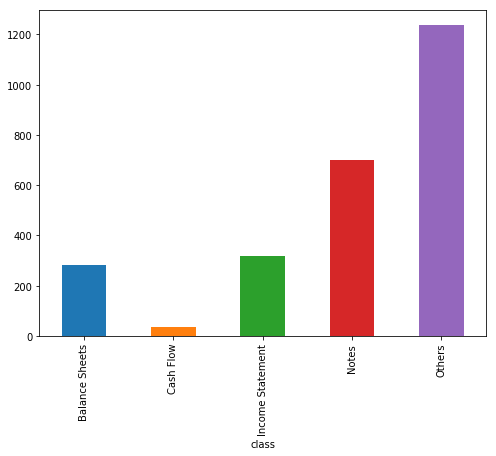

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('class').text.count().plot.bar(ylim=0)
plt.show()

## data splitting for training and testing

In [33]:
X = df['text'] # Collection of documents
y = df['category_id'] # Target or the labels we want to predict (i.e., the 5 different file)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 1)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## feature engineering
** Removing stopwords:- Words which have little significance**

In [37]:
Tfid = TfidfVectorizer(stop_words='english')
Tfid.fit(X_train)
X_train_vect = Tfid.transform(X_train)
df_train = pd.DataFrame(X_train_vect.toarray(),columns=Tfid.get_feature_names())

## model selection

In [71]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    
]

# 5 Cross-validation
CV = 5
#cv_df = pd.DataFrame(index=range(CV * len(models)))


entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train_vect, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [55]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()

acc = pd.concat([mean_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy']
acc

,Mean Accuracy
model_name,
LinearSVC,0.941711
MultinomialNB,0.890660
RandomForestClassifier,0.706528


# MultinomialNB

In [56]:
Mnb = MultinomialNB()
Mnb.fit(X_train_vect.toarray(),y_train)
X_test_vect = Tfid.transform(X_test)
y_pred = Mnb.predict(X_test_vect.toarray())

In [57]:
X_pred = Mnb.predict(X_train_vect.toarray())

In [58]:
print("Train Accuracy :: ", accuracy_score(y_train,X_pred))
print("Test Accuracy  :: ", accuracy_score(y_test,y_pred))

Train Accuracy ::  0.923712342079689
Test Accuracy  ::  0.8932038834951457


In [59]:
labels = [0,1,2,3,4]
confusion_matrix(y_test,y_pred,labels = labels)

array([[ 44,   0,   0,   1,   0],
       [  0,   0,   0,   7,   2],
       [  0,   0,  61,   0,   8],
       [  0,   0,   1, 128,  19],
       [  1,   0,   5,  11, 227]], dtype=int64)

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,y_pred)) #precision,recall

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        45
          1       0.00      0.00      0.00         9
          2       0.91      0.88      0.90        69
          3       0.87      0.86      0.87       148
          4       0.89      0.93      0.91       244

avg / total       0.88      0.89      0.89       515



# LinearSVC()

In [62]:
Lsv = LinearSVC()
Lsv.fit(X_train_vect.toarray(),y_train)
X_test_vect = Tfid.transform(X_test)
y_pred = Lsv.predict(X_test_vect.toarray())

In [63]:
X_pred = Lsv.predict(X_train_vect.toarray())

In [64]:
print("Train Accuracy :: ", accuracy_score(y_train,X_pred))
print("Test Accuracy  :: ", accuracy_score(y_test,y_pred))

Train Accuracy ::  0.9941690962099126
Test Accuracy  ::  0.941747572815534


In [66]:
labels = [0,1,2,3,4]
confusion_matrix(y_test,y_pred,labels = labels)

array([[ 45,   0,   0,   0,   0],
       [  0,   8,   0,   1,   0],
       [  2,   0,  62,   0,   5],
       [  0,   0,   1, 134,  13],
       [  1,   0,   2,   5, 236]], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,y_pred)) #precision,recall

             precision    recall  f1-score   support

          0       0.94      1.00      0.97        45
          1       1.00      0.89      0.94         9
          2       0.95      0.90      0.93        69
          3       0.96      0.91      0.93       148
          4       0.93      0.97      0.95       244

avg / total       0.94      0.94      0.94       515



## reason for selection:-
- 1) The RandomForestClassifier give ~70% accuracy which is less than other model hence we are not selecting this model.
- 2) The MultinomialNB give ~92% accuracy in traing and ~89% in testing set which is looks good for model selection.
- 3) The LinearSVC gives ~99% accuracy in traing and ~94% in testing set which is also look good.

## but from confusion_matrix,precision,recall LinearSVC gives better performance.

# Because of above reason i selected LinearSVC.